In [161]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from model import PredictModel

In [162]:
data_path = '../data/ds2.csv'
test_size = .1
epochs = 1000

In [163]:
df = pd.read_csv(data_path)

df['cum_number_of_fault'] = df['number_of_fault'].cumsum()

df

,testing_date,number_of_fault,cum_number_of_fault
0,1,0,0
1,2,0,0
2,3,0,0
3,4,1,1
4,5,1,2
...,...,...,...
176,177,0,223
177,178,0,223
178,179,0,223
179,180,0,223


In [164]:
X = df[['testing_date']].values
y = df[['cum_number_of_fault']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [165]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [166]:
model = PredictModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch % 100 == 0):
        print(f'{epoch=}, MSE: {loss.item():.4f}, total_bug_est: {model.est.weight.item():.4f}' )

epoch=0, MSE: 0.1449, total_bug_est: 1.0100
epoch=100, MSE: 0.0006, total_bug_est: 1.0113
epoch=200, MSE: 0.0003, total_bug_est: 0.9981
epoch=300, MSE: 0.0003, total_bug_est: 0.9924
epoch=400, MSE: 0.0003, total_bug_est: 0.9913
epoch=500, MSE: 0.0003, total_bug_est: 0.9912
epoch=600, MSE: 0.0003, total_bug_est: 0.9914
epoch=700, MSE: 0.0003, total_bug_est: 0.9914
epoch=800, MSE: 0.0003, total_bug_est: 0.9916
epoch=900, MSE: 0.0003, total_bug_est: 0.9917


total fault estimate: 219.14890348911283


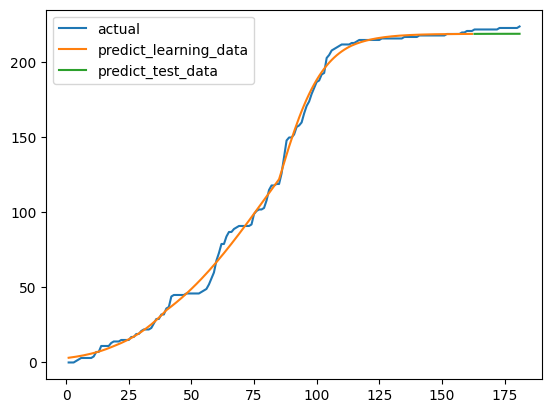

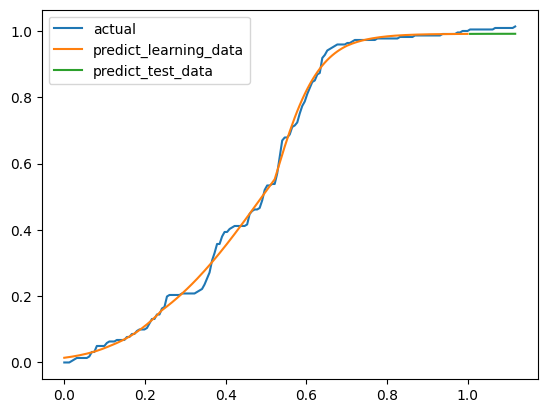

In [167]:
model.eval()

with torch.no_grad():
    y_pred_learning_tensor = model(X_train_tensor)
    y_pred_tensor = model(X_test_tensor)

total_fault_est = model.est.weight.item()
print(f'total fault estimate: {scaler_y.inverse_transform(np.array([[total_fault_est]]))[0, 0]}')

plt.figure()
plt.plot(df['testing_date'], df['cum_number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train_tensor.numpy()), scaler_y.inverse_transform(y_pred_learning_tensor.numpy()), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test_tensor.numpy()), scaler_y.inverse_transform(y_pred_tensor.numpy()), label='predict_test_data')
plt.legend()
plt.show()

plt.figure()
plt.plot(scaler_X.transform(df['testing_date'].values.reshape(-1, 1)), scaler_y.transform(df['cum_number_of_fault'].values.reshape(-1, 1)), label='actual')
plt.plot(X_train_tensor.numpy(), y_pred_learning_tensor.numpy(), label='predict_learning_data')
plt.plot(X_test_tensor.numpy(), y_pred_tensor.numpy(), label='predict_test_data')
plt.legend()
plt.show()

In [168]:
print(y_pred_learning_tensor[-5:-1])
print(y_pred_tensor)


tensor([[0.9910],
        [0.9910],
        [0.9911],
        [0.9911]])
tensor([[0.9912],
        [0.9912],
        [0.9913],
        [0.9913],
        [0.9913],
        [0.9914],
        [0.9914],
        [0.9914],
        [0.9914],
        [0.9914],
        [0.9914],
        [0.9915],
        [0.9915],
        [0.9915],
        [0.9915],
        [0.9915],
        [0.9915],
        [0.9915],
        [0.9915]])


In [169]:
# 全てのパラメータを表示
for name, param in model.named_parameters():
    print(f"Name: {name}")
    print(f"Param: {param.data}")

Name: fc1.weight
Param: tensor([[-1.2820],
        [-0.5308],
        [-0.7958],
        [-0.0772],
        [-0.7032],
        [-0.2308],
        [ 0.6448],
        [-0.4144],
        [-0.9725],
        [ 0.5134],
        [-1.2831],
        [ 1.2217],
        [-0.6191],
        [-0.7265],
        [-0.9359],
        [-0.2321],
        [ 0.2721],
        [-0.4583],
        [-0.5821],
        [ 0.7840],
        [-0.2429],
        [-0.2121],
        [ 0.9867],
        [-0.6793],
        [-0.8879],
        [ 1.2007],
        [-0.7835],
        [ 0.9315],
        [ 0.1673],
        [-0.8083],
        [ 0.7926],
        [-0.9028]])
Name: fc1.bias
Param: tensor([ 1.1434e+00, -8.4457e-02, -5.0397e-01, -5.3849e-01, -3.8614e-02,
        -9.3908e-01,  4.5526e-01, -9.9361e-01, -3.1499e-01,  1.0014e+00,
         9.0056e-01, -6.3784e-01,  5.5546e-01, -8.1524e-01,  1.1855e+00,
        -9.8567e-01,  8.1478e-01, -7.5005e-01,  5.2252e-01,  5.0066e-01,
         3.3862e-01, -6.4387e-01, -5.1504e-01, -6.992